In [1]:
import numpy as np 
import pandas as pd # for working with dataframes
from scipy import stats
import seaborn as sns # for data visualization 
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import cross_validate

from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

import warnings # http://blog.johnmuellerbooks.com/2015/11/30/warnings-in-python-and-anaconda/
warnings.filterwarnings("ignore")

In [72]:
df = pd.read_csv('C:/Users/Nidhi/OneDrive/Desktop/SocialSurvey.csv')
df.head()

,Gender,Age,HEQ,Mstatus,PES,Media,InfoPortal,PBrowser,PEngine,Strong_GHE,...,PSearchEngine_Auto,Strong_GHE_Auto,PlanToJoin,Impact_SN.1,Impact_FF.1,Diversity_Culture.1,Impact_Language.1,SF_Manual,IG_Manual,PlanToStay_Auto
0,Male,21-28 years,Bachelor of Science,Single,Graduation,Internet Sources,DAAD.de,Google Chrome,Google,,...,6,1,1,2,4,5,4,13,5,3
1,Female,29-35 years,Bachelor of Engineering,Married,Graduation,Facebook,Deutschland.de,Google Chrome,Mozilla Firefox,MTech,...,13,32,0,5,5,5,5,4,4,3
2,Female,21-28 years,Bachelor of Technology,Single,Graduation,Newspaper and magazine ads,Deutschland.de,Mozilla Firefox,Mozilla Firefox,FOM University,...,13,12,0,5,4,5,5,14,3,3
3,Female,29-35 years,PG,Single,Graduation,Internet Sources,Any,Google Chrome,DuckDuckGo,,...,5,1,0,4,4,4,5,6,4,2
4,Male,29-35 years,Bachelor of Science,Single,Graduation,Fairs and Advertising;Internet Sources;Faceboo...,DAAD.de,Google Chrome,Google,Berlin University of Technology,...,6,5,0,4,5,4,3,15,6,2


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               162 non-null    object
 1   Age                  162 non-null    object
 2   HEQ                  162 non-null    object
 3   Mstatus              162 non-null    object
 4   PES                  162 non-null    object
 5   Media                162 non-null    object
 6   InfoPortal           162 non-null    object
 7   PBrowser             162 non-null    object
 8   PEngine              162 non-null    object
 9   Strong_GHE           162 non-null    object
 10  Impact_SN            162 non-null    object
 11  Impact_FF            162 non-null    object
 12  Diversity_Culture    162 non-null    object
 13  Impact_Language      162 non-null    object
 14  SocialFactors        157 non-null    object
 15  Indulge_German       155 non-null    object
 16  PlanToSt

Text(0.5, 1.0, 'Plan To Join Distribution')

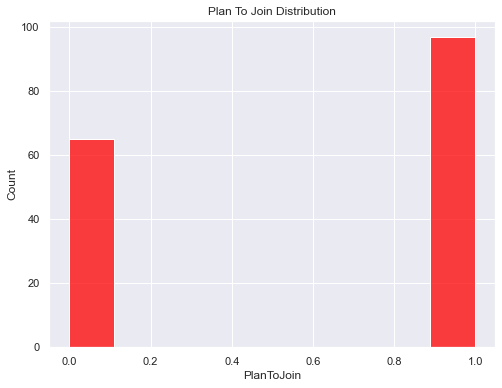

In [81]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.histplot(df['PlanToJoin'],color="red").set_title('Plan To Join Distribution')

In [90]:
unused_col = ['Gender','Age','HEQ','Mstatus','InfoPortal','PBrowser','PEngine','Strong_GHE','Impact_SN','Impact_FF','Diversity_Culture','Media', 'InfoPortal_Auto', 'PBrowser_Auto','Impact_Language','SocialFactors','PES','Indulge_German','PlanToStay','Join','PES_Manual','Media_Auto','PSearchEngine_Auto','Strong_GHE_Auto']
df1 = df.drop(columns=unused_col).reset_index(drop=True)
df1.tail()

,GenderManual,AgeManual,HEQ_Auto,MStatus_Manual,PlanToJoin,Impact_SN.1,Impact_FF.1,Diversity_Culture.1,Impact_Language.1,SF_Manual,IG_Manual,PlanToStay_Auto
157,1,2,5,1,1,3,3,3,3,17,8,2
158,1,2,5,1,1,1,2,4,3,17,8,3
159,1,2,8,1,0,4,3,3,4,12,1,1
160,2,2,9,1,1,5,3,4,4,4,3,2
161,2,1,9,1,1,5,5,5,5,2,2,2


In [83]:
pd.isnull(df1).sum()

GenderManual           0
AgeManual              0
HEQ_Auto               0
MStatus_Manual         0
PlanToJoin             0
Impact_SN.1            0
Impact_FF.1            0
Diversity_Culture.1    0
Impact_Language.1      0
SF_Manual              0
IG_Manual              0
PlanToStay_Auto        0
dtype: int64

<AxesSubplot:>

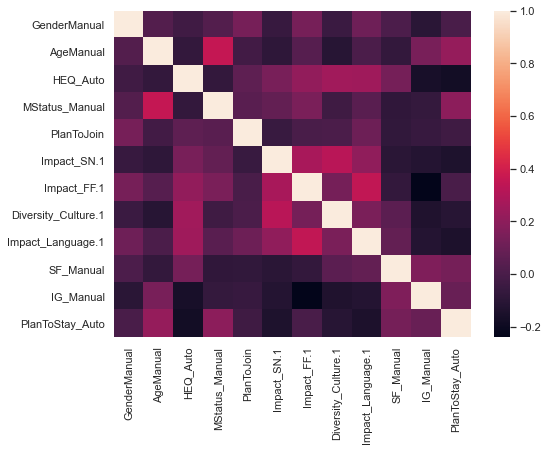

In [84]:
sns.heatmap(df1.corr())

Text(0.5, 1.0, 'Plans to join Based on Gender')

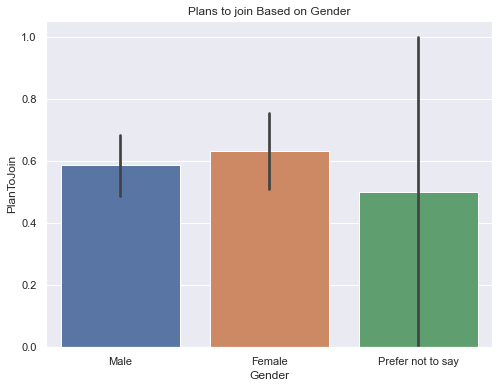

In [85]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.barplot(x = 'Gender', y = 'PlanToJoin', data = df)
plt.title('Plans to join Based on Gender')

Text(0.5, 1.0, 'Plans to join Based on Age')

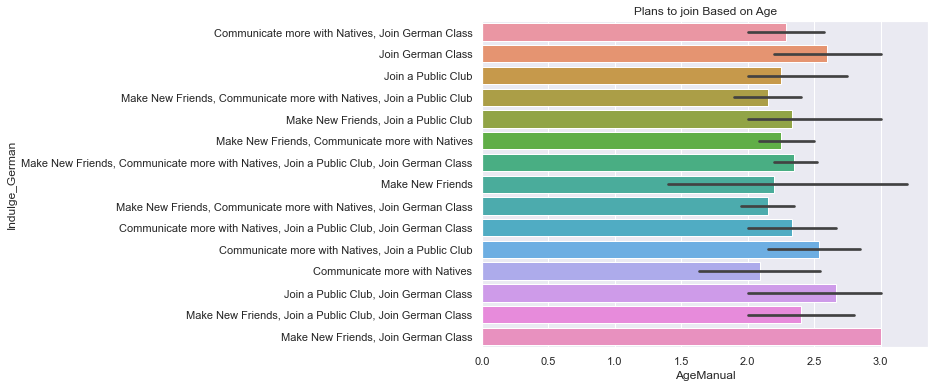

In [86]:
sns.barplot(x = 'AgeManual', y = 'Indulge_German', data = df)
plt.title('Plans to join Based on Age')

Text(0.5, 1.0, 'Impact of Family and Friends Based on different Age and Gender')

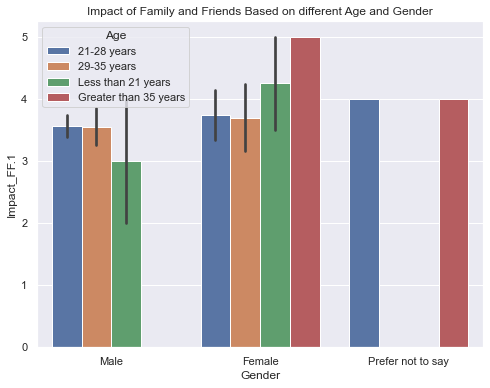

In [87]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.barplot(x = 'Gender', y = 'Impact_FF.1', hue = 'Age', data = df)
plt.title('Impact of Family and Friends Based on different Age and Gender')

Text(0.5, 1.0, 'Impact of Cultural Diversity on Age')

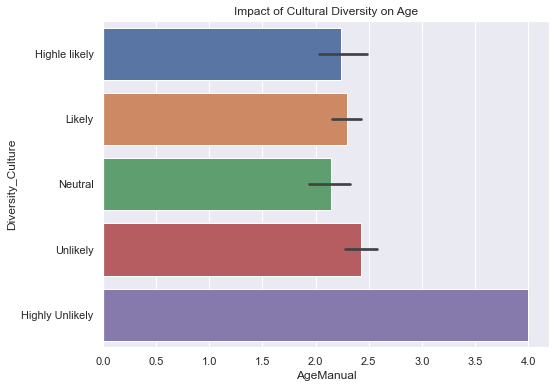

In [91]:
sns.barplot(x = 'AgeManual', y = 'Diversity_Culture', data = df)
plt.title('Impact of Cultural Diversity on Age')